# Language detection
## Data loading and learning the net

In [2]:
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("data/sentences_50k.csv", delimiter=",", encoding='utf8', index_col=0)
df.head()

,id,lan_code,sentence,unicode_length
0,1,cmn,我們試試看！,6
1,2,cmn,我该去睡觉了。,7
2,3,cmn,你在干什麼啊？,7
3,4,cmn,這是什麼啊？,6
4,5,cmn,今天是６月１８号，也是Muiriel的生日！,22


In [4]:
langs = list(df["lan_code"].unique())

In [5]:
lang_to_num = {lan: i for i, lan in enumerate(langs)}
print(lang_to_num)

num_to_lang = {i: lan for lan, i in lang_to_num.items()}
print(num_to_lang)

{'cmn': 0, 'deu': 1, 'rus': 2, 'fra': 3, 'eng': 4, 'jpn': 5, 'spa': 6, 'ita': 7, 'nld': 8, 'epo': 9, 'por': 10, 'tur': 11, 'heb': 12, 'hun': 13, 'fin': 14, 'ukr': 15, 'ces': 16, 'pol': 17, 'dan': 18, 'lit': 19, 'mkd': 20, 'kab': 21, 'ber': 22, 'mar': 23}
{0: 'cmn', 1: 'deu', 2: 'rus', 3: 'fra', 4: 'eng', 5: 'jpn', 6: 'spa', 7: 'ita', 8: 'nld', 9: 'epo', 10: 'por', 11: 'tur', 12: 'heb', 13: 'hun', 14: 'fin', 15: 'ukr', 16: 'ces', 17: 'pol', 18: 'dan', 19: 'lit', 20: 'mkd', 21: 'kab', 22: 'ber', 23: 'mar'}


In [6]:
df["lang_num"] = df["lan_code"].map(lang_to_num).astype(int)

In [7]:
import numpy as np

def sentence_to_unicode_list(sentence):
    max_len = 29
    unicode_list = [ord(i) for i in sentence]
    if len(unicode_list) >= max_len:
        unicode_list = unicode_list[:max_len]
    else:
        len_diff = max_len - len(unicode_list)
        unicode_list.extend([0 for _ in range(len_diff)])
    return unicode_list

def set_labels(lang):
    labels = [0 for _ in range(lang_count)]
    labels[lang] = 1
    return labels

lang_count = len(df['lang_num'].unique())

In [8]:
df['unicode'] = df['sentence'].apply(sentence_to_unicode_list)
df['labels'] = df['lang_num'].apply(set_labels)

In [9]:
df.dropna()
df.sample(n=(10))


,id,lan_code,sentence,unicode_length,lang_num,unicode,labels
2790856,2957140,eng,Tom is irritated by Mary's constant yelling.,44,4,"[84, 111, 109, 32, 105, 115, 32, 105, 114, 114...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7855161,8269112,ber,D ayen ugadeɣ i d-yeḍran.,25,22,"[68, 32, 97, 121, 101, 110, 32, 117, 103, 97, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1661049,1758006,deu,Er mag Andenhirse.,18,1,"[69, 114, 32, 109, 97, 103, 32, 65, 110, 100, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
148015,153889,jpn,私は彼の手紙に返事を出したくない。,17,5,"[31169, 12399, 24444, 12398, 25163, 32025, 123...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3388013,3607639,ita,"A proposito, voi dove abitate?",30,7,"[65, 32, 112, 114, 111, 112, 111, 115, 105, 11...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
5048638,5389907,rus,Не делай никаких глупостей.,27,2,"[1053, 1077, 32, 1076, 1077, 1083, 1072, 1081,...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9536229,9982632,deu,Tom lehnte mein Angebot ab.,27,1,"[84, 111, 109, 32, 108, 101, 104, 110, 116, 10...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6701825,7090839,kab,Tom yeqqim zdat kan n Mary.,27,21,"[84, 111, 109, 32, 121, 101, 113, 113, 105, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9970017,10420104,ber,Tzemremt ad d-tesɣemt asegzawal n thiligaynont.,47,22,"[84, 122, 101, 109, 114, 101, 109, 116, 32, 97...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
575160,601779,epo,Transdonu al mi la salon.,25,9,"[84, 114, 97, 110, 115, 100, 111, 110, 117, 32...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [10]:
df_numpy = df.to_numpy()

In [10]:
x = list(df_numpy[:, -2])[:-1]
y = list(df_numpy[:, -1])[:-1]
print(len(x), len(y))


9453482 9453482


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)


In [34]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(lang_count, activation='softmax'))
model.build(input_shape=(1, 29))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (1, 128)                  3840      
                                                                 
 dropout_20 (Dropout)        (1, 128)                  0         
                                                                 
 dense_22 (Dense)            (1, 256)                  33024     
                                                                 
 dropout_21 (Dropout)        (1, 256)                  0         
                                                                 
 dropout_22 (Dropout)        (1, 256)                  0         
                                                                 
 dense_23 (Dense)            (1, 512)                  131584    
                                                                 
 dropout_23 (Dropout)        (1, 512)                 

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
batch_size = 64
epochs = 30

# x = np.array([[1,1,1] for _ in range(10000)])
# y = x
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
# hist = model.fit(x_train, y_train, batch_size=1, epochs=epochs)
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
118169/118169 [==============================] - 1156s 10ms/step - loss: 2.4195 - accuracy: 0.2694 - val_loss: 2.2418 - val_accuracy: 0.3137
Epoch 2/30
118169/118169 [==============================] - 892s 8ms/step - loss: 2.4440 - accuracy: 0.2637 - val_loss: 2.3205 - val_accuracy: 0.2958
Epoch 3/30
118169/118169 [==============================] - 837s 7ms/step - loss: 2.5205 - accuracy: 0.2457 - val_loss: 2.4548 - val_accuracy: 0.2263
Epoch 4/30
118169/118169 [==============================] - 735s 6ms/step - loss: 2.6021 - accuracy: 0.2261 - val_loss: 2.4113 - val_accuracy: 0.2821
Epoch 5/30
118169/118169 [==============================] - 734s 6ms/step - loss: 2.6002 - accuracy: 0.2259 - val_loss: 2.5796 - val_accuracy: 0.2235
Epoch 6/30
118169/118169 [==============================] - 737s 6ms/step - loss: 2.7483 - accuracy: 0.1892 - val_loss: 2.6718 - val_accuracy: 0.1860
Epoch 7/30
118169/118169 [==============================] - 736s 6ms/step - loss: 2.7969 - accurac

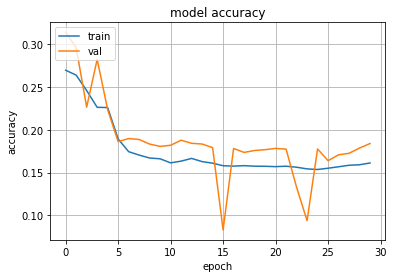

In [85]:
from matplotlib import pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

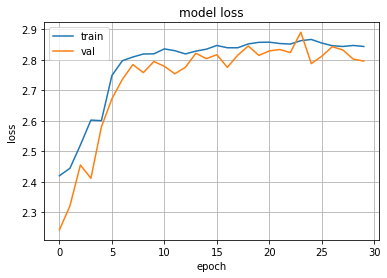

In [87]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [38]:
save_path = 'models/'
model.save_weights(save_path + 'dense_network.h5')

In [81]:
model_conv = models.Sequential()
model_conv.add(layers.Conv1D(32, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Conv1D(64, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Conv1D(128, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Conv1D(256, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Conv1D(128, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Conv1D(64, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Conv1D(32, 1, activation='tanh'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Dense(1024, activation='softmax'))
model_conv.add(layers.Dropout(0.3))
model_conv.add(layers.Dense(lang_count, activation='softmax'))
model_conv.build(input_shape=(None, 1, 29))
model_conv.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_82 (Conv1D)          (None, 1, 32)             960       
                                                                 
 dropout_39 (Dropout)        (None, 1, 32)             0         
                                                                 
 conv1d_83 (Conv1D)          (None, 1, 64)             2112      
                                                                 
 dropout_40 (Dropout)        (None, 1, 64)             0         
                                                                 
 conv1d_84 (Conv1D)          (None, 1, 128)            8320      
                                                                 
 dropout_41 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_85 (Conv1D)          (None, 1, 256)          

In [82]:
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
x = list(df_numpy[:, -2])[:-1]
y = list(df_numpy[:, -1])[:-1]
x = [[i] for i in x]
y = [[i] for i in y]
print(len(x), len(y))



9453482 9453482


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)


In [83]:
batch_size = 64
epochs = 30

hist_conv = model_conv.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
118169/118169 [==============================] - 1439s 12ms/step - loss: 2.6328 - accuracy: 0.2089 - val_loss: 2.6010 - val_accuracy: 0.2129
Epoch 2/30
118169/118169 [==============================] - 1261s 11ms/step - loss: 2.6286 - accuracy: 0.2096 - val_loss: 2.6030 - val_accuracy: 0.2132
Epoch 3/30
118169/118169 [==============================] - 1196s 10ms/step - loss: 2.6448 - accuracy: 0.2054 - val_loss: 2.6257 - val_accuracy: 0.2076
Epoch 4/30
118169/118169 [==============================] - 988s 8ms/step - loss: 2.6517 - accuracy: 0.2035 - val_loss: 2.6362 - val_accuracy: 0.2053
Epoch 5/30
118169/118169 [==============================] - 1200s 10ms/step - loss: 2.6597 - accuracy: 0.2018 - val_loss: 2.6363 - val_accuracy: 0.2038
Epoch 6/30
118169/118169 [==============================] - 1294s 11ms/step - loss: 2.6658 - accuracy: 0.2000 - val_loss: 2.6720 - val_accuracy: 0.1981
Epoch 7/30
118169/118169 [==============================] - 1284s 11ms/step - loss: 2.6819

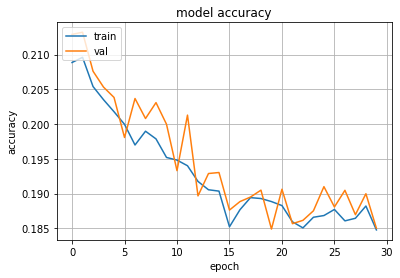

In [88]:
from matplotlib import pyplot as plt

plt.plot(hist_conv.history['accuracy'])
plt.plot(hist_conv.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

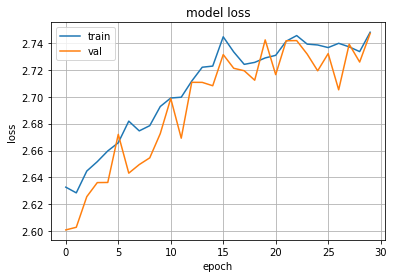

In [89]:
plt.plot(hist_conv.history['loss'])
plt.plot(hist_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [37]:
x = list(df_numpy[:, -2])[:1000]
y = list(df_numpy[:, -1])[:1000]
x = [[i] for i in x]
# y = [[i] for i in y]
print(len(x), len(y))



1000 1000


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [34]:
model_rec = models.Sequential()

model_rec.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True))
)
model_rec.add(layers.Bidirectional(layers.LSTM(lang_count)))
# model_rec.add(layers.GlobalMaxPooling1D())
model_rec.add(layers.Dense(lang_count, activation='softmax'))
model_rec.build(input_shape=(None, 1, 29))

model_rec.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_18 (Bidirecti  (None, 1, 128)           48128     
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 48)               29376     
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 24)                1176      
                                                                 
Total params: 78,680
Trainable params: 78,680
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_rec.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
batch_size = 64
epochs = 30

hist_rec = model_rec.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30


: 

: 

In [37]:
sentences = df['sentence'].values

In [38]:
sentences

array(['我們試試看！', '我该去睡觉了。', '你在干什麼啊？', ..., 'Los botaron.',
       'Los hicieron correr.', 'Los corrieron.'], dtype=object)

In [39]:
sentences_lang_num = df["lang_num"].values.T[0]

In [40]:
sentences_lang_num.shape

()

In [41]:
del df